In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the file
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.options.display.max_columns = 30 #to view all the columns

In [4]:
#first 5 rows are obtained
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#gives the general info about the dataset like the non-null counts and the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#to find whether there is any null values for each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#shape gives the no:of rows and columns
df.shape

(7043, 21)

In [8]:
#shows the list of columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
"""total charges column is object..so checking if there is any missing value.
there are 11 missing values in this column.
We can infer that the tenure is 0 in aall these cases.

""" 
df[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# Replacing the mssing value into 0 and converting the object into float value.
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [11]:
#checking whether the column is converted into float type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
""" To find the sd,median,mean and count of the foating and numerical value columns.
The 50% represents the median=1394.55 and mean=2279.73 with a standard deviation of 2266.794 for Total charges.
"""
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.732178
std,0.368612,24.559481,30.090047,2266.794434
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.549988
50%,0.000000,29.000000,70.350000,1394.550049
75%,0.000000,55.000000,89.850000,3786.599976
max,1.000000,72.000000,118.750000,8684.799805


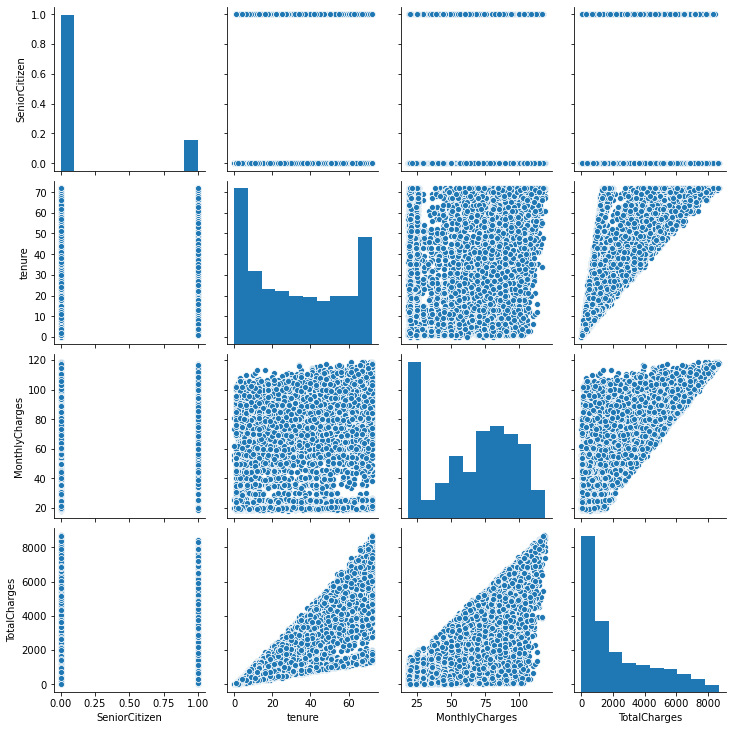

In [13]:
#Plotting the numerical columns
sns.pairplot(data=df)

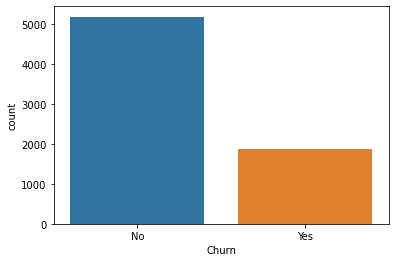

In [14]:
#churn No = (5100/7043)*100= 72.4%
#churn Yes  = 100-72.4= 27.6%
sns.countplot(x="Churn",data=df)

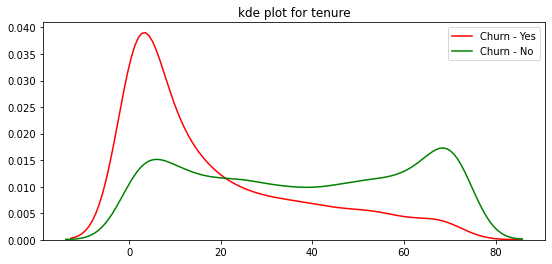

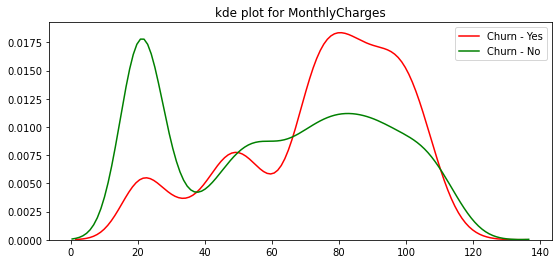

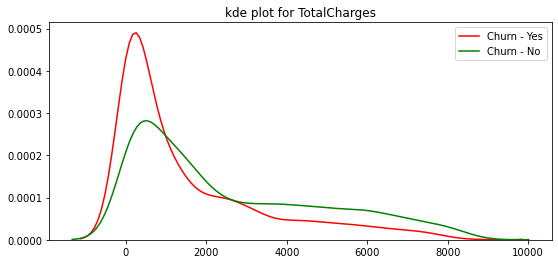

In [15]:
"""
checking the churn status of other numerical fields using kde plot
we can see that recent joiners have a churning tendency more and high monthly charges leads to churning
"""
def kde(feature):
    plt.figure(figsize=(9,4))
    plt.title("kde plot for {}".format(feature))
    ax0=sns.kdeplot(df[df["Churn"]=="Yes"][feature],color="red",label= "Churn - Yes")
    ax1=sns.kdeplot(df[df["Churn"]=="No"][feature],color="green",label="Churn - No")
kde("tenure")
kde("MonthlyCharges")
kde("TotalCharges")

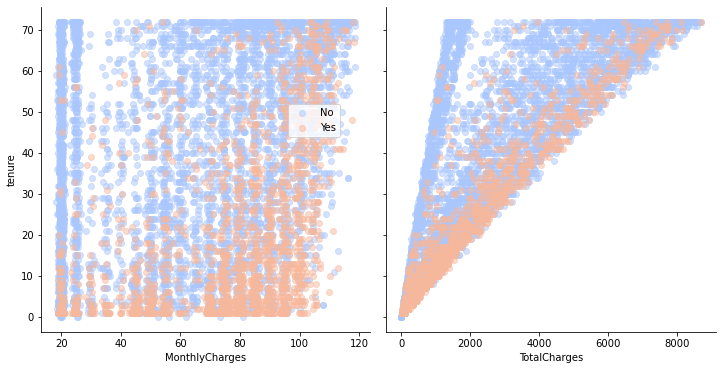

In [16]:

g=sns.PairGrid(df,x_vars=["MonthlyCharges","TotalCharges"],y_vars="tenure",hue="Churn",palette="coolwarm",height=5)
g.map(plt.scatter,alpha=0.5)
plt.legend(loc=(-0.3,0.6))

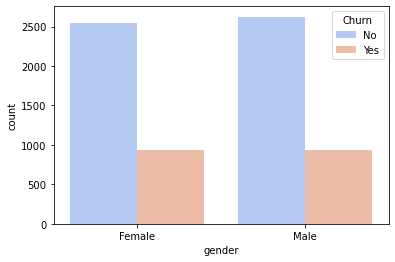

In [17]:
#Finding the total no:of males and females .We can see that churning rate and no:of males and females are more like similar.
sns.countplot(x="gender",data=df,hue="Churn",palette="coolwarm")

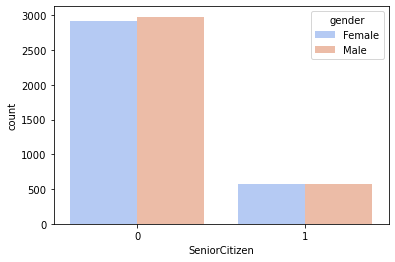

In [18]:
#To find the senior citizens.We can infer that there are less senior citizen people joined when compared to youngsters.
sns.countplot(x="SeniorCitizen",hue="gender",data=df,palette="coolwarm")

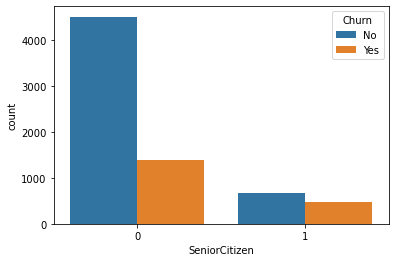

In [19]:
#The churning rate of senior citizens is less.
sns.countplot(x="SeniorCitizen",hue="Churn",data=df)

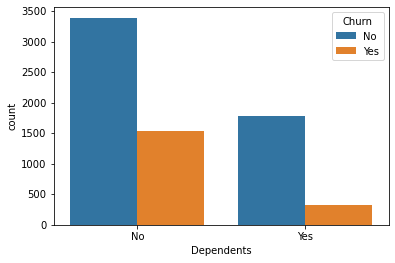

In [20]:
#The dependents has a less churning rate when compared to others.
sns.countplot(x="Dependents",hue="Churn",data=df)

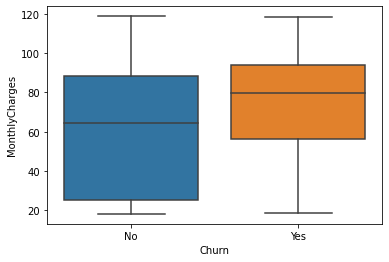

In [21]:
#we can see that as monthly charges increases, churning increases
sns.boxplot(x="Churn",y="MonthlyCharges",data=df)

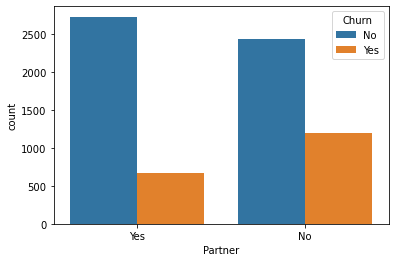

In [22]:
#people who are single shows more churning rate
sns.countplot(x="Partner",hue="Churn",data=df)

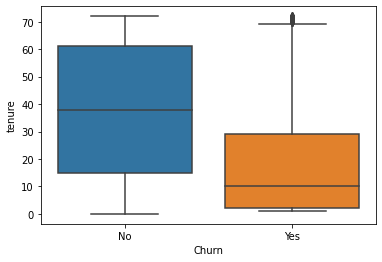

In [23]:
#people who joined for a long time are less likely to churn
sns.boxplot(y="tenure",x="Churn",data=df)

In [24]:

#finding the 23 columns
df.columns



Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
"""
The columns having "No internet service" are replaced to "No"
The column "MultipleLines" having "No phone service" are replaced to "No"
"""
replace_cols=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for i in replace_cols:
    df[i]  = df[i].replace('No internet service' , 'No')
df["MultipleLines"]=df["MultipleLines"].replace("No phone service","No")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f922d6a5ed0>,
      dtype=object)

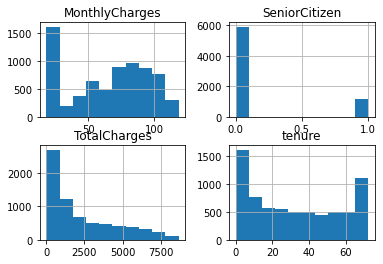

In [26]:
#Getting histogram plot of the numerical columns
df.hist()

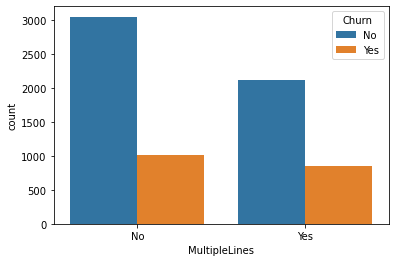

In [27]:
"""
people with or without multiple lines are showing equal churning.
so multiple lines might not be directly related to churn rate

"""
sns.countplot(x="MultipleLines",hue="Churn",data=df)

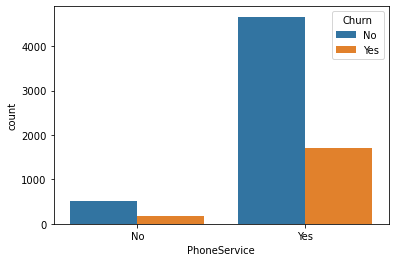

In [28]:
#finding the phone service count.people having phone service are showing high churning tendency
sns.countplot(x="PhoneService",hue="Churn",data=df)

AxesSubplot(0.125,0.125;0.775x0.755)


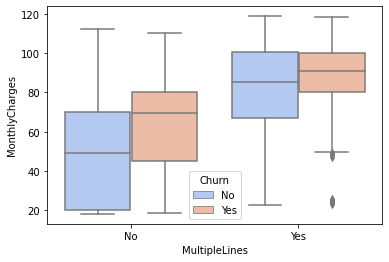

In [29]:
"""
Visualizing using a box plot
multiple lines with high monthly charges is showing high churning rate.
Whether or not the person has multiple lines, if he has high monthly charges, he has a tendency to churn.

"""
print(sns.boxplot(x="MultipleLines",y="MonthlyCharges",hue="Churn",data=df,palette="coolwarm"))


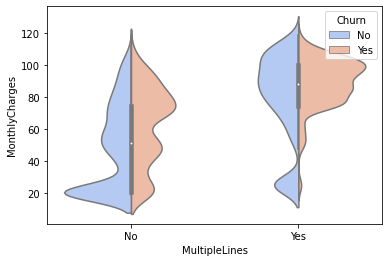

In [30]:
#Similar as Box Plot, using a violin plot.
sns.violinplot(x="MultipleLines",y="MonthlyCharges",hue="Churn",data=df,palette="coolwarm",split=True)

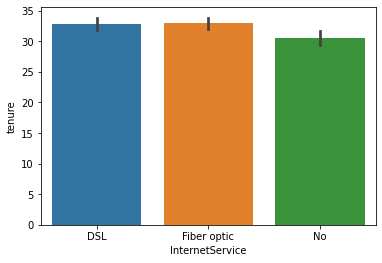

In [31]:
#tenure is more or less same for the DSL and fibre optic internet services
sns.barplot(x="InternetService",y="tenure",data=df)

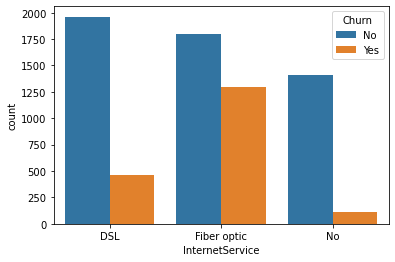

In [32]:
#churning is high for customers having fibre optic connections
sns.countplot(x="InternetService",hue="Churn",data=df)

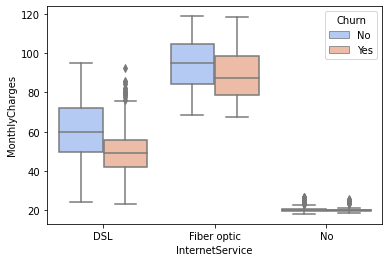

In [33]:
#Fibre optic services have a high monthly charge when compared to others and so is the churn rate
sns.boxplot(x="InternetService",y="MonthlyCharges",hue="Churn",data=df,palette="coolwarm")

<Figure size 432x288 with 0 Axes>

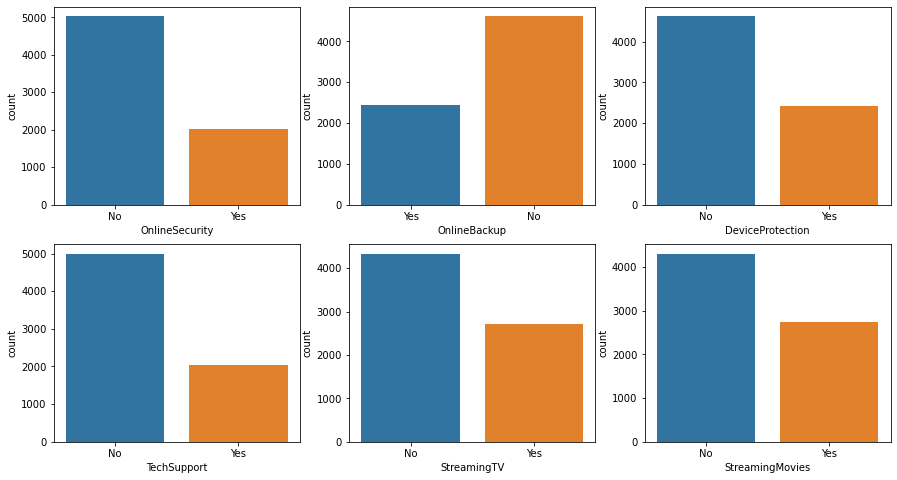

In [34]:
#To display the columns together with subplot
cols=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies',]
plt.tight_layout()
fig, axes =plt.subplots(2,3,figsize=(15,8))
sns.countplot(data=df,x=cols[0], ax=axes[0,0])
sns.countplot(data=df,x=cols[1], ax=axes[0,1])
sns.countplot(data=df,x=cols[2], ax=axes[0,2])
sns.countplot(data=df,x=cols[3], ax=axes[1,0])
sns.countplot(data=df,x=cols[4], ax=axes[1,1])
sns.countplot(data=df,x=cols[5], ax=axes[1,2])
fig.show()


<Figure size 432x288 with 0 Axes>

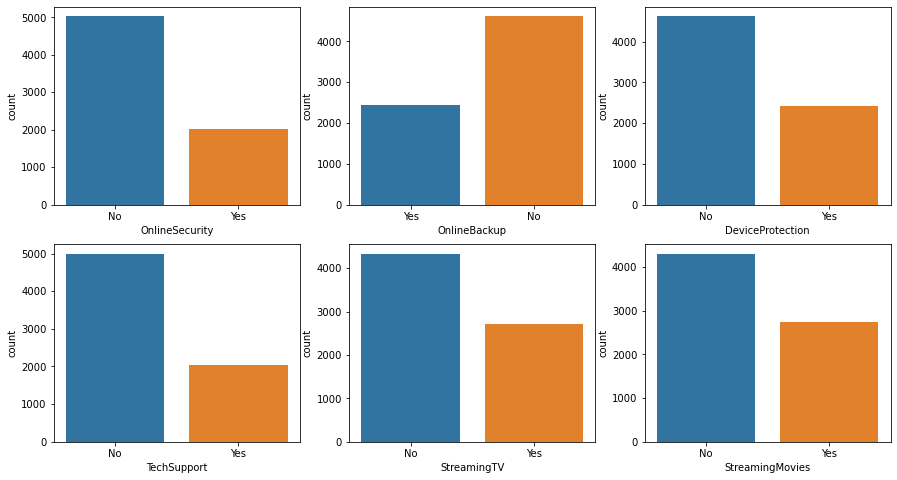

In [35]:
#To display these columns together with subplots using for loop
cols=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies',]
x=0
y=0
num=0
plt.tight_layout()
fig, axes =plt.subplots(2,3,figsize=(15,8))
for x in range(2):
    for y in range(3):
        sns.countplot(x=cols[num],data=df,ax=axes[x,y])
        num +=1
         

<Figure size 432x288 with 0 Axes>

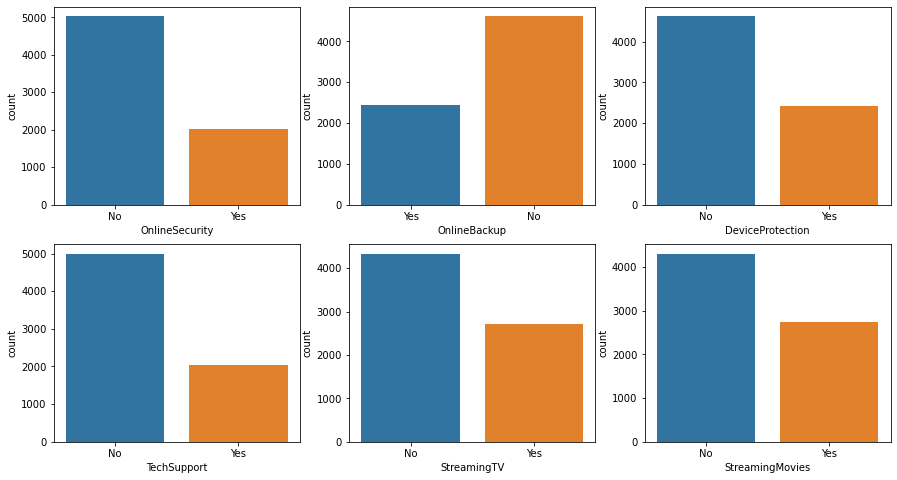

In [36]:
#To display these columns together with subplots using zip and flatten functions.

df1=df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']].copy()
plt.tight_layout()
fig, axes =plt.subplots(2,3,figsize=(15,8))

"""
 zip() creates an iterator that will aggregate elements from two or more iterables.
Here in the case is a for loop.
The flatten() function is used to get a copy of a given array collapsed into one dimension. 
"""
for cols,ax in zip(df1, axes.flatten()[:6]):
    sns.countplot(data = df1, x = cols, ax = ax)

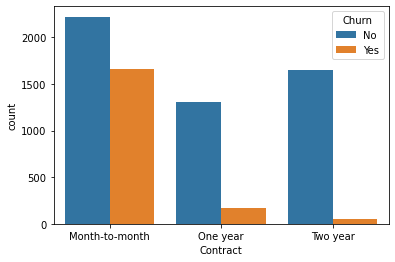

In [37]:
#people with monthly contract showing high churning rate.
sns.countplot(x="Contract",data=df,hue="Churn")

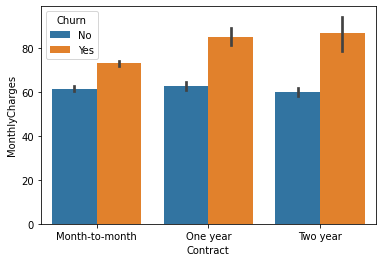

In [38]:
#monthly charges is high for for all kind of contracts
sns.barplot(x="Contract",y="MonthlyCharges",hue="Churn",data=df)

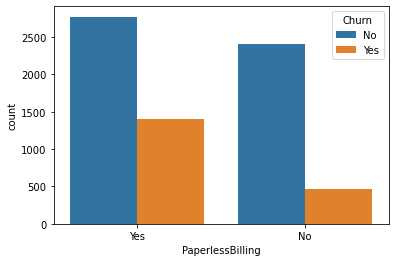

In [39]:
"""
checking the count of paperless billing.
Churn rate more for paperless billing.This can be because of more companies offering paper less billing
"""
sns.countplot(x="PaperlessBilling",hue="Churn",data=df)

In [40]:
#Checking the count of different payment methods
df["PaymentMethod"].value_counts()


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

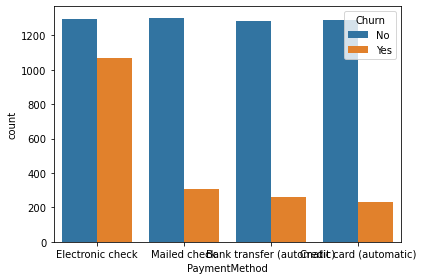

In [41]:
"""
Electronic check payment method is giving more churning.
This might be because of loading issues due to traffic or there might be other complaints.
"""
sns.countplot(x="PaymentMethod",hue="Churn",data=df)
plt.tight_layout()

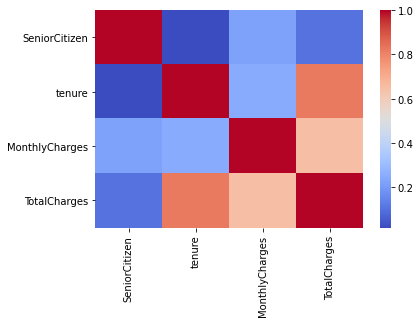

In [42]:
#Using a heatmap to find the correlation between the numerical columns
tc=df.corr()
sns.heatmap(tc,xticklabels=True,cmap="coolwarm")

In [43]:
#Creating dummy values for the categorical columns for visualization and modelling purpose
dummy=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
df=pd.get_dummies(df, prefix=dummy, columns=dummy,drop_first=True)#to get either one of the columns.ie, yes or no

In [44]:
#To check whether the columns are updated or not.
df.head() 

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.850000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.500000,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.150002,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.750000,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.649994,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [45]:
#Splitting dataset into X and y arrays
X=df.drop(["customerID","Churn_Yes"],axis=1)#multi dimensional array 

#target column(dependent coumn) is taken i.e churn/not churn
y = df["Churn_Yes"]

"""
FeatureSelection-Method_1
to check which are the best features of this dataset that can predict the target.
"""
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 12 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score')) 

                          features          Score
3                     TotalCharges  624292.006842
1                           tenure   16278.923685
2                   MonthlyCharges    3680.787699
18               Contract_Two year     488.578090
21  PaymentMethod_Electronic check     426.422767
9      InternetService_Fiber optic     374.476216
10              InternetService_No     286.520193
17               Contract_One year     176.123171
11              OnlineSecurity_Yes     147.295858
14                 TechSupport_Yes     135.559783
0                    SeniorCitizen     134.351545
6                   Dependents_Yes     133.036443


[0.02143862 0.16927051 0.17992892 0.19631235 0.02799333 0.02275282
 0.01969706 0.00680013 0.02036424 0.04698524 0.01626814 0.02197111
 0.02164768 0.01867813 0.02189243 0.01762728 0.01791801 0.02457724
 0.03671901 0.0259487  0.01346397 0.03920224 0.01254285]


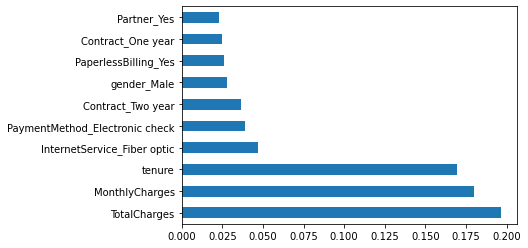

In [46]:
#FeatureSelection-Method_2
from sklearn.ensemble import RandomForestClassifier 
#you can also use "ExtraTreesClassifier".Gives almost the same results.

import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #inbuilt function which enables gives feature importances

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

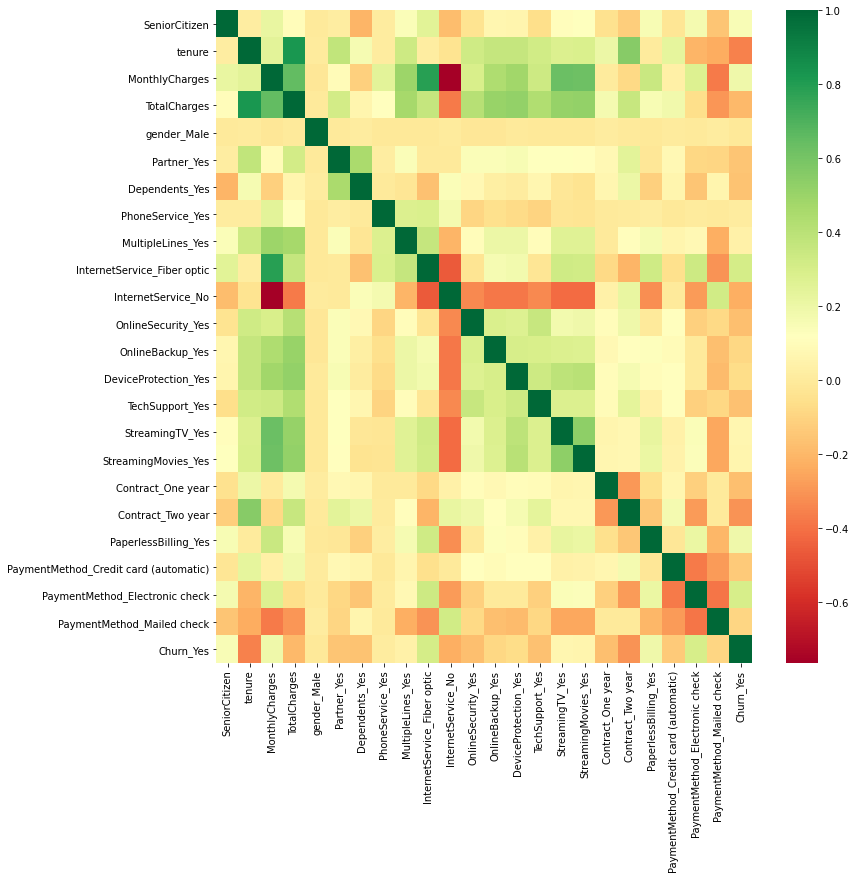

In [47]:
"""
#Feature_Selection-Method_3

Heat map to find correlation between all the column variables and find the best features
green repreprents correlation = 1
red represents correlation= 0

"""
plt.figure(figsize=(12,12))
correlating=df.corr()
sns.heatmap(correlating,cmap="RdYlGn")

In [48]:
#Using the different methods, selecting the top 6 features
X=df[["TotalCharges","tenure","MonthlyCharges","Contract_Two year","PaymentMethod_Electronic check","InternetService_Fiber optic"]]

In [49]:
#Splitting the whole dataset into 2:Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [50]:
"""
Using a standard scaler to scale all columns into a small range which makes prediction more easier and 
decreses the chances of the model getting biased.

"""
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train) #Fitting and transforming the X train dataset
X_test=sc.transform(X_test)#Transforming the test dataset

In [51]:
#Checking the transformed values
X_train

array([[-0.72099151, -0.95520209,  0.2679385 , -0.55376216, -0.71475839,
        -0.88742729],
       [-0.48452596, -0.75110969,  0.59379741, -0.55376216,  1.39907416,
         1.12685288],
       [ 0.38515858,  1.28981426, -0.56926825,  1.80582942,  1.39907416,
        -0.88742729],
       ...,
       [-0.48410498,  1.04490339, -1.47498893,  1.80582942, -0.71475839,
        -0.88742729],
       [-0.9787505 , -1.28174992,  0.162661  , -0.55376216,  1.39907416,
         1.12685288],
       [-0.96778251, -1.15929448, -1.48668643, -0.55376216, -0.71475839,
        -0.88742729]])

In [52]:
#Classification Model-1
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#fitting the train values( both X and y )
lr.fit(X_train,y_train)
#Predicting the y valus for the X_test
y_pred=lr.predict(X_test)

In [53]:
#Performance check using Confusion matrix,accuracy score and Classification Report
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

print(confusion_matrix(y_pred,y_test))
print("\n") #correct prediction= 1425+250, wrong prediction=135+303

print(classification_report(y_pred,y_test))
print("\n") # to get the values of precision,recall,f1-score and support

print(accuracy_score(y_pred,y_test))#accuracy score is 79.2%
#Accuracy=(Total no:of correct predictions)/(Total no:of prdictions)

[[1425  303]
 [ 135  250]]


              precision    recall  f1-score   support

           0       0.91      0.82      0.87      1728
           1       0.45      0.65      0.53       385

    accuracy                           0.79      2113
   macro avg       0.68      0.74      0.70      2113
weighted avg       0.83      0.79      0.81      2113



0.7927117841930904


In [54]:
#Classification Model-2
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)


print(confusion_matrix(y_pred,y_test))
print("\n")
print(classification_report(y_pred,y_test))
print("\n")
print(accuracy_score(y_pred,y_test))
#Accuracy=78.6%


[[1384  276]
 [ 176  277]]


              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1660
           1       0.50      0.61      0.55       453

    accuracy                           0.79      2113
   macro avg       0.69      0.72      0.71      2113
weighted avg       0.80      0.79      0.79      2113



0.7860861334595362


In [55]:
#Classification Model-3
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

print(confusion_matrix(y_pred,y_test))
print("\n")
print(classification_report(y_pred,y_test))
print("\n")
print(accuracy_score(y_pred,y_test))
#Accuracy=77.4%

[[1357  274]
 [ 203  279]]


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1631
           1       0.50      0.58      0.54       482

    accuracy                           0.77      2113
   macro avg       0.69      0.71      0.69      2113
weighted avg       0.79      0.77      0.78      2113



0.7742546142924751


In [56]:
#Classification Model-4
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
y_pred=gaussian.predict(X_test)

print(confusion_matrix(y_pred,y_test))
print("\n")
print(classification_report(y_pred,y_test))
print("\n")
print(accuracy_score(y_pred,y_test))
#Accuracy=72.4%

[[1135  157]
 [ 425  396]]


              precision    recall  f1-score   support

           0       0.73      0.88      0.80      1292
           1       0.72      0.48      0.58       821

    accuracy                           0.72      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.72      0.72      0.71      2113



0.7245622337908187


In [57]:
#Classification Model-5
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

print(confusion_matrix(y_pred,y_test))
print("\n")
print(classification_report(y_pred,y_test))
print("\n")
print(accuracy_score(y_pred,y_test))
#Accuracy=72.4%

[[1277  300]
 [ 283  253]]


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1577
           1       0.46      0.47      0.46       536

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.73      0.72      0.73      2113



0.7240889730241363


In [58]:
#Classification Model-6
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)

print(confusion_matrix(y_pred,y_test))
print("\n")
print(classification_report(y_pred,y_test))
print("\n")
print(accuracy_score(y_pred,y_test))
#Accuracy=77.8%

[[1396  303]
 [ 164  250]]


              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1699
           1       0.45      0.60      0.52       414

    accuracy                           0.78      2113
   macro avg       0.67      0.71      0.69      2113
weighted avg       0.81      0.78      0.79      2113



0.7789872219592996


In [59]:
#Classification Model-7
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf",C=1,gamma=0.001,random_state=0)
classifier1.fit(X_train,y_train)
y_pred=classifier1.predict(X_test)

print(confusion_matrix(y_pred,y_test))
print("\n")
print(classification_report(y_pred,y_test))
print("\n")
print(accuracy_score(y_pred,y_test))
#Accuracy=79.08%

[[1418  300]
 [ 142  253]]


              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1718
           1       0.46      0.64      0.53       395

    accuracy                           0.79      2113
   macro avg       0.68      0.73      0.70      2113
weighted avg       0.82      0.79      0.80      2113



0.7908187411263606


In [60]:
#Classification Model-8
from sklearn.svm import SVC
classifier2 = SVC(kernel="linear",random_state=0)
classifier2.fit(X_train,y_train)
y_pred=classifier1.predict(X_test)

print(confusion_matrix(y_pred,y_test))
print("\n")
print(classification_report(y_pred,y_test))
print("\n")
print(accuracy_score(y_pred,y_test))

[[1418  300]
 [ 142  253]]


              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1718
           1       0.46      0.64      0.53       395

    accuracy                           0.79      2113
   macro avg       0.68      0.73      0.70      2113
weighted avg       0.82      0.79      0.80      2113



0.7908187411263606


In [61]:
"""
Model Selection: using k-fold Cross validation
"""
#Checking Logistic Regression Model's accuracy
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=lr,X=X_train,y=y_train,cv=10)
print("Mean_Accuracy:",accuracies.mean())
print("\n")
print("Standard Deviation:",accuracies.std())


Mean_Accuracy: 0.7953346855983772


Standard Deviation: 0.019102508788948466


In [62]:
#Checking XGBoost Model's accuracy
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=xgb,X=X_train,y=y_train,cv=10)
print("Accuracy:",accuracies.mean())
print("\n")
print("Standard Deviation:",accuracies.std())


Accuracy: 0.7789046653144016


Standard Deviation: 0.00977005645338117


In [63]:
"""
Checking SVM model's accuracy using Grid search and finding whether the model is linearly seperable or not.
Here we get the best parameters tobe selected

"""
from sklearn.model_selection import GridSearchCV
parameters=[{"C":[0.25,0.5,0.75,1],"kernel":["linear"]},{"C":[1,10,100,1000],"kernel":["rbf"],"gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

grid_search=GridSearchCV(estimator=classifier1,param_grid=parameters,scoring="accuracy",cv=10,n_jobs=-1)

grid_search.fit(X_train,y_train)
best_score=grid_search.best_score_
best_parameters=grid_search.best_params_


print("Best_Score:",best_score)
print("\n")
print("Best_Parameters:",best_parameters)
#Getting an overall acuracy of 80%



Best_Score: 0.8002028397565922


Best_Parameters: {'C': 10, 'gamma': 0.4, 'kernel': 'rbf'}
